In [11]:
import pandas as pd
import tkinter as tk
import ipywidgets
from matplotlib import pyplot as plt
df = pd.read_csv("test_file.csv", delimiter='\t')
df = df.sort_values(by=['PRODUCT NAME'], ascending=True)

In [13]:
products = df['PRODUCT NAME'].unique()
products

array(['(acyl-carrier-protein) S-malonyltransferase',
       '1,4-alpha-glucan branching enzyme',
       '1-acyl-sn-glycerol-3-phosphate acyltransferase', ...,
       'tRNA synthetases class II (A)',
       'tRNA synthetases class II core domain (F)',
       'tmRNA-binding protein'], dtype=object)

In [15]:
#Show suggestions
def key_press(event):
    input_text = entry.get()
    listbox.delete(0, tk.END)
    matching_products = [product for product in products if product.lower().startswith(input_text.lower())] # Change from starts with to include
    for product in matching_products[:10]:
        listbox.insert(tk.END, product)
    if not matching_products:
        listbox.insert(tk.END, "No products found")

#Add products to selected box
def on_list_select():
    selection = listbox.curselection()
    selected_items = []
    for index in selection:
        if listbox.get(index) != "No products found":
            selected_items.append(listbox.get(index))
    for item in selected_items:
        search_list.insert(tk.END, item)
    listbox.selection_clear(0, tk.END)

def on_begin():
    items_list = []
    all_items = []
    all_items = search_list.get(0, tk.END)
    
    for item in all_items:
        items_list.append(item)
    unique_items = set(items_list)
    golden_products = list(unique_items)
    if len(golden_products) > 0:
        print(golden_products)
    else:
        print("No items are in cart!")

def on_clear():
    search_list.delete('0','end')
    


#Main loop
root = tk.Tk()
root.title("Product Search")

entry = tk.Entry(root, width=50)
entry.place(x=200, y=200)
entry.pack(padx=10, pady=10)
input_text = entry.get()
entry.bind('<KeyRelease>' ,key_press)

frame = tk.Frame(root)
frame.pack(padx = 10, pady= 10)

products_label = tk.Label(frame, text="Choose Products for Search")
products_label.grid(row=0, column=0)

selected_label = tk.Label(frame, text="Cart")
selected_label.grid(row=0, column=1)

listbox = tk.Listbox(frame, width=50, height=10, selectmode='multiple')
listbox.grid(row=1, column=0)

search_list = tk.Listbox(frame, width=50, height=10)
search_list.grid(row=1, column=1)

bframe = tk.Frame(root)
bframe.pack(padx = 10, pady= 10)
           
button = tk.Button(bframe, text='Add to cart', command=on_list_select)
button.grid(row=1, column=0, padx=10)
button2 = tk.Button(bframe, text='Begin', command=on_begin)
button2.grid(row=1, column=1, padx=10)
button3 = tk.Button(bframe, text='Clear', command=on_clear)
button3.grid(row=1, column=2, padx=10)

root.mainloop()

['Aminotransferase class-V', 'Aminotransferase class-III']
No items are in cart!
['Aminotransferase class-V']


## Results window

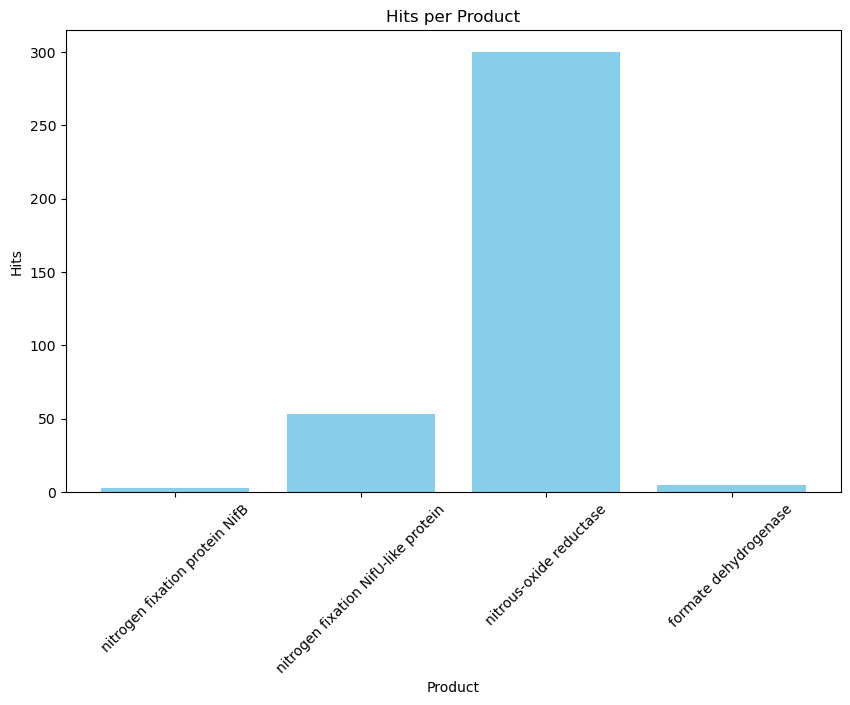

In [18]:
import os
path = os.path.dirname('__file__')
out_file_path = os.path.join(path, 'Output_files')
extension = '.csv'
files = [file for file in os.listdir(out_file_path) if file.endswith(extension)]
df = pd.DataFrame(columns=['Product', 'Hits'])
dfs = []
for file in files:
    tdf = pd.read_csv(os.path.join(out_file_path,file), delimiter='\t')
    hits = len(tdf)
    product = file.split('.')[0]
    dfs.append(pd.DataFrame({'Product': [product], 'Hits': [hits]}))
df = pd.concat(dfs, ignore_index=True)
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size of the plot as needed
ax.bar(df['Product'], df['Hits'], color='skyblue')
ax.set_xlabel('Product')
ax.set_ylabel('Hits')
ax.set_title('Hits per Product')
ax.tick_params(axis='x', rotation=45) 

# Show the plot
plt.show()

In [96]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
root = tk.Tk()
root.title("Results")
# Create a matplotlib figure

# Create a canvas to display the plot
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack()



root.mainloop()